# ITMO ML Lab1. Kernel regression.

In [1]:
import pandas as pd

## Data preprocessing

In [2]:
data = pd.read_csv("dataset_191_wine.csv")

In [3]:
data

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.isna().sum()

class                             0
Alcohol                           0
Malic_acid                        0
Ash                               0
Alcalinity_of_ash                 0
Magnesium                         0
Total_phenols                     0
Flavanoids                        0
Nonflavanoid_phenols              0
Proanthocyanins                   0
Color_intensity                   0
Hue                               0
OD280%2FOD315_of_diluted_wines    0
Proline                           0
dtype: int64

In [5]:
y = data['class']

In [6]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class, Length: 178, dtype: int64

In [7]:
X = data.drop(columns=['class'])
X

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
X.dtypes

Alcohol                           float64
Malic_acid                        float64
Ash                               float64
Alcalinity_of_ash                 float64
Magnesium                           int64
Total_phenols                     float64
Flavanoids                        float64
Nonflavanoid_phenols              float64
Proanthocyanins                   float64
Color_intensity                   float64
Hue                               float64
OD280%2FOD315_of_diluted_wines    float64
Proline                             int64
dtype: object

## Normalizing

In [9]:
def minmax(data):
    value_min = min(data)
    value_max = max(data)
    return value_min, value_max


def normalize(series):
    data = list(series)
    v_min, v_max = minmax(data)
    delta = v_max - v_min
    for i in range(len(data)):
        data[i] = (data[i] - v_min) / delta
    return pd.Series(data)

In [10]:
def normalize_columns(cols):
    for col in cols:
        X[col] = normalize(data[col])

In [11]:
cols = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids',
       'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280%2FOD315_of_diluted_wines',
       'Proline'
       ]

normalize_columns(cols)

In [12]:
X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


## Hyperparameter optimization

In [13]:
import sys

In [14]:
# def uniform_split(data, parts_count, classes_count):
#     data = list(data) 
#     parts = [[] for _ in range(parts_count)]
#     classes = [[] for _ in range(classes_count)]
#     cur_part = 0
#     for el_index, el_class in enumerate(data):
#         classes[el_class - 1].append(el_index)
#     for class_index, class_elements in enumerate(classes):
#         for i, element in enumerate(class_elements):
#             parts[cur_part].append(i)
#             cur_part = (cur_part + 1) % parts_count
#     return parts

In [15]:
def compute_positive(conf_matrix):
    return [sum(line) for line in conf_matrix]


def compute_true_positive(conf_matrix):
    return [line[i] for i, line in enumerate(conf_matrix)]


def compute_false_positive(conf_matrix):
    return [sum(line_1[i] for line_1 in conf_matrix) - line[i] for i, line in enumerate(conf_matrix)]


def compute_f1_score(conf_matrix, f1_type="default", prec=None, rec=None):
    true_positive = compute_true_positive(conf_matrix)
    false_positive = compute_false_positive(conf_matrix)
    positive = compute_positive(conf_matrix)
    precision = compute_precision(true_positive, false_positive)
    recall = compute_recall(true_positive, positive)
    all = sum(positive)
    if f1_type == 'default':
        return [0 if p + r == 0 else 2 * p * r / (p + r) for p, r in zip(prec, rec)]
    elif f1_type == 'macro':
        class_probabilities = [p / all for p in positive]
        weighted_precision = sum([cp * p for cp, p in zip(class_probabilities, precision)])
        weighted_recall = sum([cp * r for cp, r in zip(class_probabilities, recall)])
        return compute_f1_score(conf_matrix, "default", [weighted_precision], [weighted_recall])[0]
    elif f1_type == 'micro':
        return sum(
            f1 * p for f1, p in zip(compute_f1_score(conf_matrix, "default", precision, recall), positive)) / all


def compute_precision(true_positive, false_positive):
    return [0 if tp + fp == 0 else tp / (tp + fp) for tp, fp in zip(true_positive, false_positive)]


def compute_recall(true_positive, positive):
    return [0 if p == 0 else tp / p for tp, p in zip(true_positive, positive)]

In [16]:
from math import *
from statistics import mean

distance_names = ["manhattan", "euclidean", "chebyshev"]
kernel_names = ["uniform", "triangular", "epanechnikov", "quartic", "triweight", "tricube", "gaussian", "cosine",
                "logistic",
                "sigmoid"]
window_names = ["fixed", "variable"]

check_absolute_1 = lambda x, val: 0 if abs(x) >= 1 else val
dist_function = {"manhattan": lambda x, y: sum(abs(x_i - y_i) for x_i, y_i in zip(x, y)),
                 "euclidean": lambda x, y: sqrt(sum((x_i - y_i) ** 2 for x_i, y_i in zip(x, y))),
                 "chebyshev": lambda x, y: max(abs(x_i - y_i) for x_i, y_i in zip(x, y))}
kernel_function = {"uniform": lambda x: check_absolute_1(x, 1 / 2),
                   "triangular": lambda x: check_absolute_1(x, 1 - abs(x)),
                   "epanechnikov": lambda x: check_absolute_1(x, 3 / 4 * (1 - x ** 2)),
                   "quartic": lambda x: check_absolute_1(x, 15 / 16 * (1 - x ** 2) ** 2),
                   "triweight": lambda x: check_absolute_1(x, 35 / 32 * (1 - x ** 2) ** 3),
                   "tricube": lambda x: check_absolute_1(x, 70 / 81 * (1 - abs(x) ** 3) ** 3),
                   "gaussian": lambda x: 1 / (sqrt(2 * pi)) * e ** (-1 / 2 * x ** 2),
                   "cosine": lambda x: check_absolute_1(x, pi / 4 * cos(pi / 2 * x)),
                   "logistic": lambda x: 1 / (e ** x + 2 + e ** (-x)),
                   "sigmoid": lambda x: 2 / pi / (e ** x + e ** (-x))}
window_function = {"fixed": lambda d, r: r,
                   "variable": lambda d, kn: sorted(d)[kn]}


class KNNRegression:
    def __init__(self, dist_fun, kernel_fun, window_fun, h):
        self.dist_f = dist_function[dist_fun]
        self.kernel_f = kernel_function[kernel_fun]
        self.window_f = window_function[window_fun]
        self.h = h

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, x, target_count=1):
        distances = [self.dist_f(line, x) for line in self.X_train]
        win_result = self.window_f(distances, self.h)
        weighted_y = [0 for _ in range(target_count)]
        weights_sum = 0
        for i, distance in enumerate(distances):
            weight = self.kernel_f(distance / win_result) if win_result != 0 else 0
            for j in range(target_count):
                weighted_y[j] += weight * self.y_train[i][j]
            weights_sum += weight
        predicted = []
        for j in range(target_count):
            predicted.append(
                weighted_y[j] / weights_sum if weights_sum != 0 else mean(line[j] for line in self.y_train))
        return predicted

In [17]:
def one_out_cv(X, y, class_recognizer, classes_count, params, target_count=1):
    y_test = []
    y_predicted = []
    for i in range(len(X)):
        X_copy = X.copy()
        y_copy = y.copy()
        x_test = X_copy.pop(i)
        y_test.append(class_recognizer(y_copy.pop(i)))
        classifier = KNNRegression(*params)
        classifier.fit(X_copy, y_copy)
        y_predicted.append(class_recognizer(classifier.predict(x_test, target_count)))
    return get_confusion_matrix(y_test, y_predicted, classes_count)

def get_confusion_matrix(y_test, y_predicted, classes_count):
    confusion_matrix = [[0 for _ in range(classes_count)] for _ in range(classes_count)]
    for test, pred in zip(y_test, y_predicted):
        confusion_matrix[test - 1][pred - 1] += 1
    return confusion_matrix

def hyperparameter_optimization(X, y, classes_count, class_recognizer, target_count=1, curr_window_names=window_names):
    best_f1_score = 0
    for distance_name in distance_names:
        for kernel_name in kernel_names:
            for window_name in curr_window_names:
                for h in range(1, 40):
                    params = [distance_name, kernel_name, window_name, h]
                    confusion_matrix = one_out_cv(X, y, class_recognizer, classes_count, params, target_count)
                    f1_score = compute_f1_score(confusion_matrix, 'macro')
                    if best_f1_score < f1_score:
                        best_f1_score = f1_score
                        best_params = params
                        print("Finished with best params", best_params, f1_score)
    print('Overall best params:', best_params)
    print('Overall best macro f1-score:', best_f1_score)
    return best_params, best_f1_score

## Naive representation of target feature

In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class, Length: 178, dtype: int64

In [19]:
X

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [20]:
X = X.values.tolist()
y = list([i] for i in y)

In [21]:
import math

In [22]:
hyperparameter_optimization(X, y, 3, lambda x: round(x[0]))

Finished with best params ['manhattan', 'uniform', 'fixed', 1] 0.8514860076072959
Finished with best params ['manhattan', 'uniform', 'fixed', 2] 0.97807030933906
Finished with best params ['manhattan', 'uniform', 'variable', 2] 0.9888681767567175
Overall best params: ['manhattan', 'uniform', 'variable', 2]
Overall best macro f1-score: 0.9888681767567175


(['manhattan', 'uniform', 'variable', 2], 0.9888681767567175)

## One-hot representation

In [23]:
import numpy as np

In [24]:
y = [i[0] for i in y]
y = pd.DataFrame({'target': y})
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [25]:
y['target0'] = pd.Series(y.target == 1)
y['target1'] = pd.Series(y.target == 2)
y['target2'] = pd.Series(y.target == 3)
y = y.drop(columns = ['target'])
y = y.astype({'target0': 'int32', 'target1': 'int32', 'target2': 'int32'})

In [26]:
y = y.values.tolist()

In [27]:
hyperparameter_optimization(X, y, 3, lambda x: np.asarray(x).argmax() + 1, 3)

Finished with best params ['manhattan', 'uniform', 'fixed', 1] 0.8514860076072959
Finished with best params ['manhattan', 'uniform', 'fixed', 2] 0.9725895369520264
Finished with best params ['manhattan', 'uniform', 'variable', 4] 0.9726802219393046
Finished with best params ['manhattan', 'uniform', 'variable', 9] 0.9779368339893258
Finished with best params ['manhattan', 'uniform', 'variable', 11] 0.9834175280214206
Overall best params: ['manhattan', 'uniform', 'variable', 11]
Overall best macro f1-score: 0.9834175280214206


(['manhattan', 'uniform', 'variable', 11], 0.9834175280214206)

## Analyzing best model

In [28]:
import seaborn as sns

In [29]:
def plot(neighbours_count, f1_score, metrics_name):
    neighbours_count = pd.Series(neighbours_count)
    f1_score = pd.Series(f1_score)
    plot_data = pd.DataFrame({"neighbours_count": neighbours_count, metrics_name: f1_score})
    sns.lineplot(data=plot_data, x="neighbours_count", y=metrics_name)

### Variable window size

In [35]:
macro_f1_scores = []
micro_f1_scores = []
matrices = []
class_recognizer = lambda x: np.asarray(x).argmax() + 1
for h in range(1, 50):
    params = ['manhattan', 'uniform', 'variable', h]
    confusion_matrix = one_out_cv(X, y, class_recognizer, 3, params, 3)
    matrices.append(confusion_matrix)
    macro_f1_score = compute_f1_score(confusion_matrix, 'macro')
    macro_f1_scores.append(macro_f1_score)

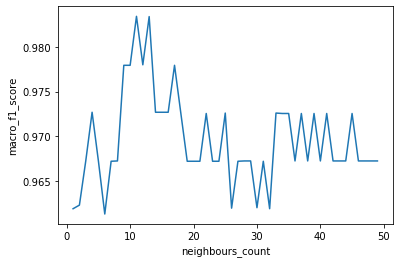

In [36]:
plot([h for h in range(1, 50)], macro_f1_scores, 'macro_f1_score')

### Fixed window size

In [39]:
hyperparameter_optimization(X, y, 3, lambda x: np.asarray(x).argmax() + 1, 3, curr_window_names=['fixed'])

Finished with best params ['manhattan', 'uniform', 'fixed', 1] 0.8514860076072959
Finished with best params ['manhattan', 'uniform', 'fixed', 2] 0.9725895369520264
Finished with best params ['manhattan', 'triangular', 'fixed', 2] 0.9834175280214206
Overall best params: ['manhattan', 'triangular', 'fixed', 2]
Overall best macro f1-score: 0.9834175280214206


(['manhattan', 'triangular', 'fixed', 2], 0.9834175280214206)

In [42]:
macro_f1_scores = []
matrices = []
class_recognizer = lambda x: np.asarray(x).argmax() + 1
for h in range(1, 50):
    params = ['manhattan', 'triangular', 'fixed', h]
    confusion_matrix = one_out_cv(X, y, class_recognizer, 3, params, 3)
    matrices.append(confusion_matrix)
    macro_f1_score = compute_f1_score(confusion_matrix, 'macro')
    macro_f1_scores.append(macro_f1_score)

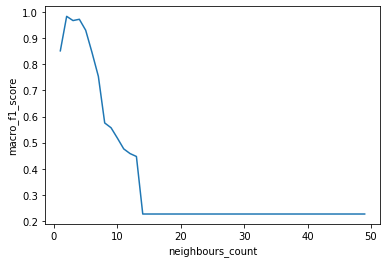

In [43]:
plot([h for h in range(1, 50)], macro_f1_scores, 'macro_f1_score')